In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


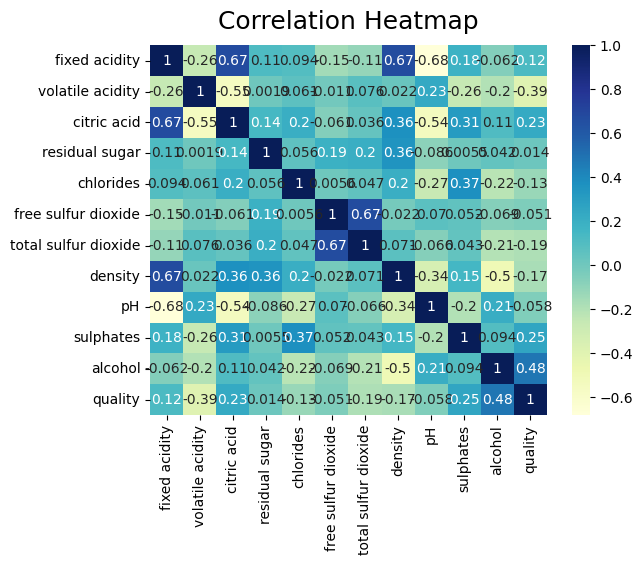

In [37]:
heatmap = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [38]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [39]:
# Split data into features (X) and target (y)
X = df.drop("quality", axis=1)
y = df["quality"]

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


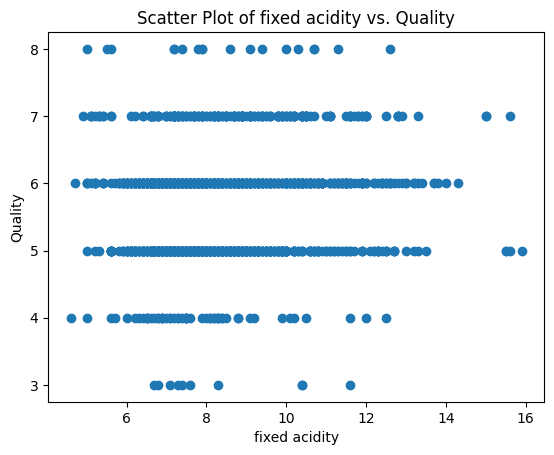

In [40]:
import matplotlib.pyplot as plt

# Assuming 'X' is your DataFrame and 'y' is your target variable
# Choose a specific column (feature) from your DataFrame 'X' to plot against 'y'
# For example, let's choose the first column:

feature_to_plot = X.columns[0] # Selecting the first column for scatter plot

plt.scatter(X[feature_to_plot], y) #Creating scatter plot for 1st column against target variable
plt.xlabel(feature_to_plot) #Naming x-axis
plt.ylabel("Quality") #Naming y-axis
plt.title(f"Scatter Plot of {feature_to_plot} vs. Quality")  #Setting title of the plot
plt.show() #Showing the plot

**Standardize features using StandardScaler**

**fit_transform scales data to have zero mean and unit variance**

In [41]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(1599, 11)

##**PCA with n_components=0.95:**
In PCA, n_components determines the **number of principal components to retain.**
####**n_components=0.95:**
This is a special case, where n_components is a **float value between 0 and 1.**
Meaning:
####**Select the minimum number of principal components that explain at least 95% of the total variance in the data.**
Retain components until the cumulative explained variance reaches or exceeds 95%.
###**How it works:**
1. Calculate the eigenvalues and eigenvectors of the covariance matrix.
2. Sort eigenvalues in descending order (corresponding to explained variance).
3. Cumulatively sum the explained variance ratios.
4. Stop when the cumulative sum reaches or exceeds 0.95 (95%).

###Example:
Suppose we have a dataset with 10 features and the following explained variance ratios:
**Component	Explained Variance Ratio**
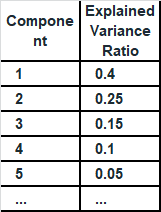


##To reach 95% cumulative explained variance:

Component 1: 40% + 25% = 65%

Component 2: 65% + 15% = 80%

Component 3: 80% + 10% = 90%

Component 4: 90% + 5% = 95%

In this case, PCA would retain 4 components, explaining approximately 95% of the total variance.
##Advantages:
1. Automatically determines the optimal number of components.
2. Ensures a specified amount of variance is explained.

##Note:
1. The actual number of components retained may vary depending on the dataset.
2. Other methods, like cross-validation, can also be used to determine the optimal number of components.

In [42]:
# Apply PCA
pca = PCA(n_components=0.95)  # Select components explaining 95% variance
X_pca = pca.fit_transform(X_scaled)

Explained Variance Ratio: [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311 ]
Number of Selected Components: 9


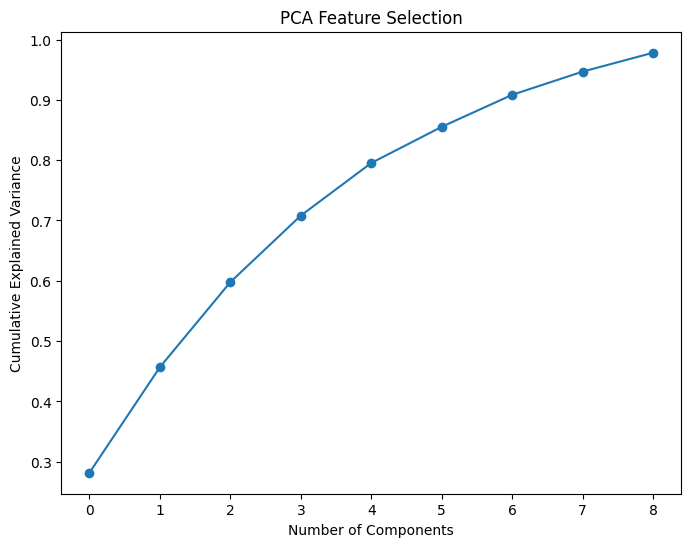

Selected Features: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')


In [43]:
# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print number of selected components
print("Number of Selected Components:", pca.n_components_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Feature Selection")
plt.show()

# Convert PCA output to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Print selected features
print("Selected Features:", X_pca_df.columns)

In [44]:
# Get PCA components' loadings
loadings = pca.components_

# Calculate absolute loading values
abs_loadings = np.abs(loadings)

# Sort and select features with high loading values
selected_features = []
for i in range(pca.n_components_):
    feature_idx = np.argmax(abs_loadings[i])
    selected_features.append(X.columns[feature_idx])

    # Set loaded feature to 0 to avoid duplicates
    abs_loadings[:, feature_idx] = 0

print("Selected Features:", selected_features)

Selected Features: ['fixed acidity', 'total sulfur dioxide', 'alcohol', 'chlorides', 'residual sugar', 'pH', 'volatile acidity', 'citric acid', 'free sulfur dioxide']
